In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [28]:
df = pd.read_csv('post-election-violence-data.csv')
df.drop(0, inplace=True)

In [29]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.index = df['event_date']

In [30]:
df['fatalities'] =df['fatalities'].apply(lambda num: int(num))

In [31]:
df2001 =df.loc['2001-12-31':'2001-01-01']

In [32]:
df2001.groupby(df2001['event_type'])['fatalities'].sum()

event_type
Battles                       364
Protests                        0
Riots                          64
Strategic developments          0
Violence against civilians    211
Name: fatalities, dtype: int64

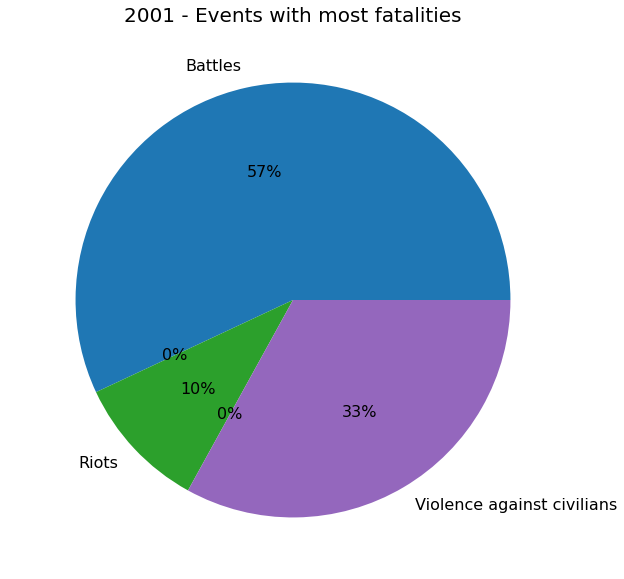

In [33]:
df2001.groupby(df2001['event_type'])['fatalities'].sum().plot.pie(autopct='%1.0f%%', figsize=(14,10), fontsize=16) 
title = '2001 - Events with most fatalities'
plt.title(title, fontsize=20)
plt.ylabel(' ')
#Save Image
plt.savefig(title, dpi=1000, facecolor='w')

In [34]:
df2001.groupby([df2001['event_type'], df2001['sub_event_type']])['fatalities'].sum()

event_type                  sub_event_type                    
Battles                     Armed clash                           364
Protests                    Excessive force against protesters      0
                            Peaceful protest                        0
                            Protest with intervention               0
Riots                       Mob violence                           63
                            Violent demonstration                   1
Strategic developments      Arrests                                 0
                            Change to group/activity                0
                            Looting/property destruction            0
Violence against civilians  Abduction/forced disappearance          0
                            Attack                                211
                            Sexual violence                         0
Name: fatalities, dtype: int64

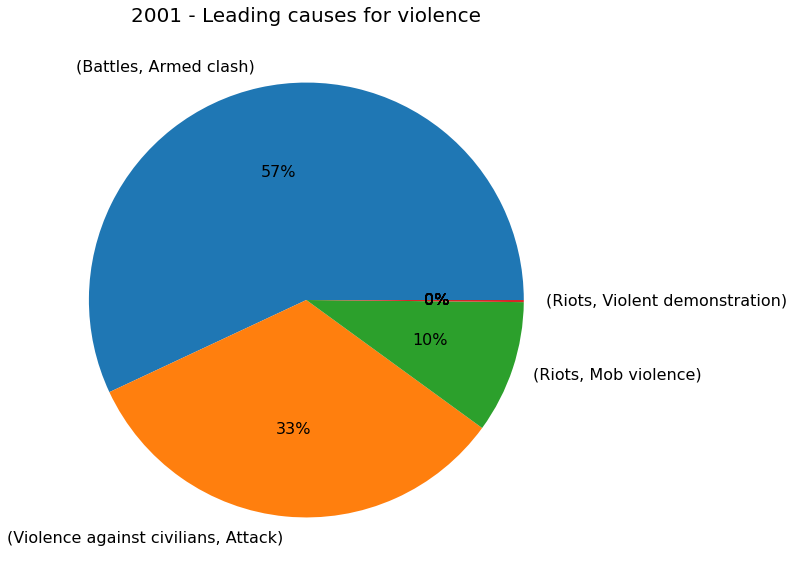

In [40]:
df2001.groupby([df2001['event_type'], df2001['sub_event_type']])['fatalities'].sum().sort_values(ascending=False).plot.pie(autopct='%1.0f%%',figsize=(14,10), fontsize=16) 
title = '2001 - Leading causes for violence'
plt.title(title, fontsize=20)
plt.ylabel(' ')
#Save Image
plt.savefig(title, dpi=1000, facecolor='w')

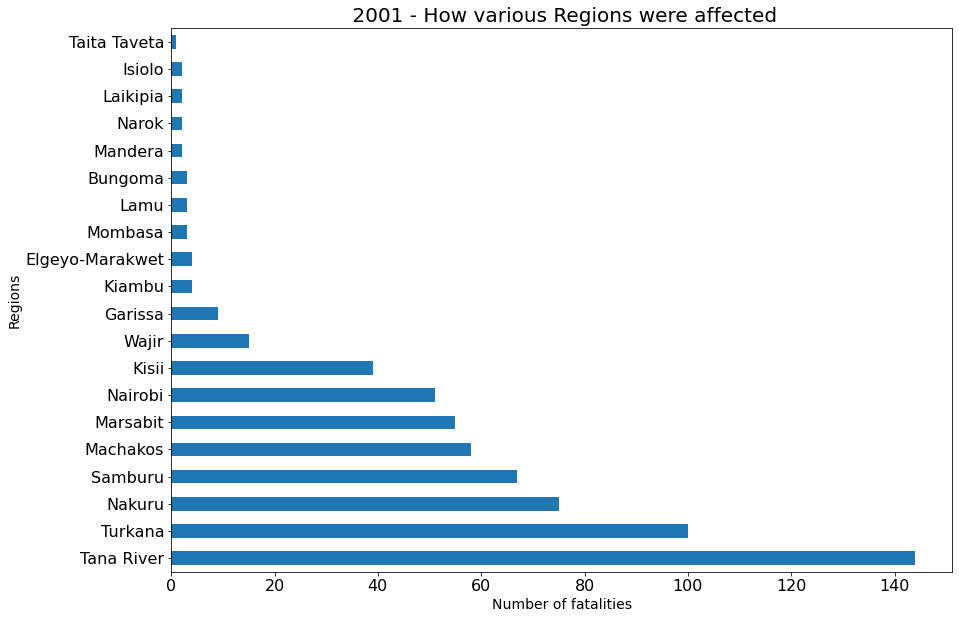

In [41]:
df2001.groupby(df2001['admin1'])['fatalities'].sum().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(14,10), fontsize=16)
title = ' 2001 - How various Regions were affected'
plt.title(title, fontsize=20)
plt.ylabel('Regions',fontsize=14)
plt.xlabel('Number of fatalities',fontsize=14)
#Save Image
plt.savefig(title, dpi=1000, facecolor='w')

In [42]:
regions = df2001.groupby([df2001['admin1'],df2001['sub_event_type']])['fatalities'].sum()


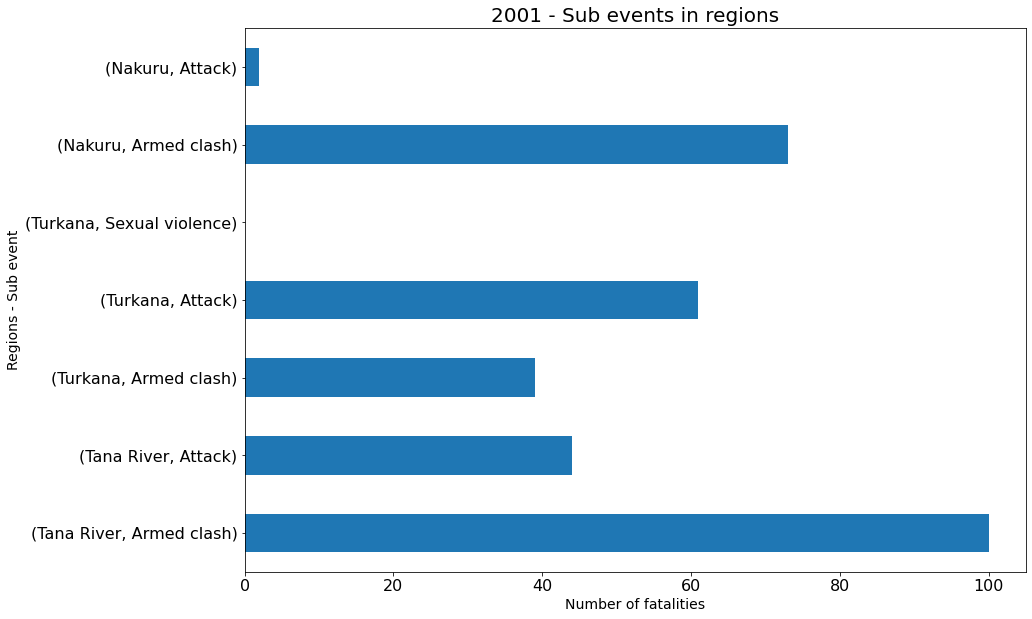

In [43]:
regions[['Tana River', 'Turkana', 'Nakuru']].plot(kind='barh', figsize=(14,10),fontsize=16)
title = '2001 - Sub events in regions'
plt.title(title, fontsize=20)
plt.ylabel('Regions - Sub event', fontsize=14)
plt.xlabel('Number of fatalities', fontsize=14)
#Save Image
plt.savefig(title, dpi=1000, facecolor='w')